In [97]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import random


def sortFunc(e):
    return e[1]

def part_1_arrival_time(mu=100,std=5): 
    return(abs(np.random.normal(loc=mu, scale=std)))

def part_2_arrival_time(mu=12,std=5):
    return(abs(np.random.normal(loc=mu, scale=std)))

def machine_A_worktime(mu=91,std=9):
    return(abs(np.random.normal(loc=mu, scale=std)))

def machine_B_worktime(mu=15,std=3):
    return(abs(np.random.normal(loc=mu, scale=std)))

def machine_B_worktime_for_part1(mu=110,std=10):
    return(abs(np.random.normal(loc=mu, scale=std)))

def machine_C_worktime(mu=25,std=4): 
    return(abs(np.random.normal(loc=mu, scale=std)))

def machine_A_next_downtime(mu=400,std=30):
    return(abs(np.random.normal(loc=mu, scale=std)))

def machine_B_next_downtime(mu=200,std=15):
    return(abs(np.random.normal(loc=mu, scale=std)))

def machine_A_downtime(mu=15,std=14): 
    return(abs(np.random.normal(loc=mu, scale=std)))

def machine_B_downtime(mu=10,std=8): 
    return(abs(np.random.normal(loc=mu, scale=std)))


def run_simulation(warmup_time = 120, operation_time = 480):

    time_now  = 0               
    num_part1_enteries = 0      
    num_part2_enteries = 0      
    time_part1_in_system = 0    
    time_part2_in_system = 0    

    FEL = []
    machines_status = {'m1':[], 'm2':[], 'm3':[]} 

    machines_isdown = {'m1':False, 'm2':False} 
   
    machines_worktime = {'m1':0, 'm2':0, 'm3':0} 
   
    total_downtime =    {'m1':0,'m2':0, 'm3':0} 

    machines_queue= {'m1':[], 'm2':{'p1':[],'p2':[]},'m3':{'p1':[], 'p2':[]}}

    machines_queue_time = {'m1':[],'m2':{'p1':[],'p2':[]},'m3':{'p1':[], 'p2':[]}}

    machines_num_parts= {'m1':0, 'm2':{'p1':0,'p2':0},'m3':{'p1':0, 'p2':0}}

    queue_log = {'m1':[],'m2':{'p1':[],'p2':[]},'m3':{'p1':[],'p2':[]}}
    time_log = []
    id_counter = 0
    parts_log = dict()

    next_down_time_A = machine_A_next_downtime()
    next_down_time_B = machine_B_next_downtime()
    FEL.append((0,0)) 
    FEL.append((1,0)) 
    FEL.append((2,next_down_time_A))
    FEL.append((3,next_down_time_B))

    
    print('Warming up system ...',end=' ')
    
    while time_now < warmup_time:
    
        FEL.sort(key = sortFunc)
        earliest_event = FEL[0]

        time_now = earliest_event[1]
        FEL.remove(earliest_event)

        if  earliest_event[0] == 0: 

            id_counter += 1
            parts_log[str(id_counter)]={
                'type':1,
                'arrival_time':time_now}

            next_arrival = time_now + part_1_arrival_time()
            FEL.append((0,next_arrival))

            if not machines_isdown['m1']: 
                if machines_status['m1'] == []: 
                    machines_status['m1'].append(str(id_counter))
                    parts_log[str(id_counter)]['entered_machine_A_time'] = time_now
                    finish_time = time_now + machine_A_worktime()
                    if finish_time > next_down_time_A:
                        time_left_A = finish_time - next_down_time_A
                        FEL.append((6, 5000))
                    FEL.append((6,finish_time))
                else: 
                    machines_queue['m1'].append(str(id_counter))
                    machines_queue_time['m1'].append(time_now)
                    parts_log[str(id_counter)]['entered_queue_A_time'] = time_now

            else: 
                if (machines_status['m2'] == []) and (not machines_isdown['m2']): 
                    machines_status['m2'].append(str(id_counter))
                    parts_log[str(id_counter)]['entered_machine_B_time'] = time_now
                    finish_time = time_now + machine_B_worktime_for_part1()
                    if finish_time > next_down_time_B:
                        time_left_B = finish_time - next_down_time_B
                        FEL.append((7, 5001))
                    FEL.append((7,finish_time))
                else:
                    machines_queue['m2']['p1'].append(str(id_counter))
                    machines_queue_time['m2']['p1'].append(time_now)
                    parts_log[str(id_counter)]['entered_queue_B_time'] = time_now


        elif earliest_event[0] == 1: 

            id_counter += 1
            parts_log[f'{id_counter}']={
                'type':2,
                'arrival_time':time_now}

            next_arrival = time_now + part_2_arrival_time()
            FEL.append((1,next_arrival))
            
            if (not machines_isdown['m2']) and machines_status['m2'] == []: 
                machines_status['m2'].append(str(id_counter))
                parts_log[str(id_counter)]['entered_machine_B_time'] = time_now
                finish_time = time_now + machine_B_worktime()
                if finish_time > next_down_time_B:
                    time_left_B = finish_time - next_down_time_B
                    FEL.append((8,5001))
                FEL.append((8,finish_time))

            else: 
                machines_queue['m2']['p2'].append(str(id_counter))
                machines_queue_time['m2']['p2'].append(time_now)
                parts_log[str(id_counter)]['entered_queue_B_time'] = time_now

        
        elif earliest_event[0] == 2: 

            machines_isdown['m1'] = True
            for p in machines_queue['m1']:
                parts_log[p]['moved_from_queue_AtoB_time'] = time_now
            machines_queue['m2']['p1'] += machines_queue['m1']
            machines_queue_time['m2']['p1'] += machines_queue_time['m1']
            machines_queue['m1'] = []
            machines_queue_time['m1'] = []
            repair_time = time_now + machine_A_downtime()
            FEL.append((4,repair_time))
            for i in range(1,3):
                if FEL[-i][1] == 5000:
                    finish_time = time_left_A + repair_time
                    FEL[-i] = (6, finish_time)

        
        elif earliest_event[0] == 3: 

            machines_isdown['m2'] = True
            repair_time = time_now + machine_B_downtime()
            FEL.append((5,repair_time))
            if FEL[-1][1] == [5001]:
                finish_time = repair_time + time_left_B
                FEL[-1][1] = finish_time


        elif earliest_event[0] == 4: 

            machines_isdown['m1'] = False
            for p in machines_queue['m2']['p1']:
                parts_log[p]['moved_from_queue_BtoA_time'] = time_now
            machines_queue['m1'] += machines_queue['m2']['p1']
            machines_queue_time['m1'] += machines_queue_time['m2']['p1']
            machines_queue['m2']['p1'] = []
            machines_queue_time['m2']['p1'] = []
            next_down_time_A = time_now + machine_A_next_downtime()
            FEL.append((2,next_down_time_A))


        elif earliest_event[0] == 5: 
            
            machines_isdown['m2'] = False
            next_down_time_B = time_now + machine_B_next_downtime()
            FEL.append((3,next_down_time_B))

        
        elif earliest_event[0] == 6:

            leaving_part = machines_status['m1'][0]
            parts_log[leaving_part]['left_machine_A_time'] = time_now

            if len(machines_queue['m1']) == 0: 
                machines_status['m1'] = []
                
            else: 

                incoming_part = machines_queue['m1'].pop(0)
                machines_status['m1'] = [incoming_part]
                parts_log[incoming_part]['entered_machine_A_time'] = time_now
                out_time = machines_queue_time['m1'].pop(0)
                finish_time = time_now + machine_A_worktime()
                if finish_time > next_down_time_A:
                    time_left_A = finish_time - next_down_time_A
                    FEL.append((6, 5000))
                FEL.append((6,finish_time))

            if machines_status['m3'] == []: 
                
                machines_status['m3'].append(leaving_part)
                parts_log[leaving_part]['entered_machine_C_time'] = time_now
                finish_time = time_now + machine_C_worktime()
                FEL.append((9,finish_time))
            else:
                
                machines_queue['m3']['p1'].append(leaving_part)
                parts_log[leaving_part]['entered_queue_C_time'] = time_now
                machines_queue_time['m3']['p1'].append(time_now)

        elif earliest_event[0] == 7: 

            leaving_part = machines_status['m2'][0]
            parts_log[leaving_part]['left_machine_B_time'] = time_now

            if (len(machines_queue['m2']['p1']) == 0) and (len(machines_queue['m2']['p2']) == 0): 
                machines_status['m2'] = []

            elif len(machines_queue['m2']['p1']) != 0: 
                
                incoming_part = machines_queue['m2']['p1'].pop(0)
                machines_status['m2'] = [incoming_part]
                parts_log[incoming_part]['entered_machine_B_time'] = time_now
                out_time = machines_queue_time['m2']['p1'].pop(0)
                finish_time = time_now + machine_B_worktime_for_part1()
                if finish_time > next_down_time_B:
                    time_left_B = finish_time - next_down_time_B
                    finish_time((7, 5001))
                FEL.append((7,finish_time))

            elif len(machines_queue['m2']['p2']) != 0: 
                
                incoming_part = machines_queue['m2']['p2'].pop(0)
                machines_status['m2'] = [incoming_part]
                parts_log[incoming_part]['entered_machine_B_time'] = time_now
                out_time = machines_queue_time['m2']['p2'].pop(0)
                finish_time = time_now + machine_B_worktime()
                if finish_time > next_down_time_B:
                    time_left_B = finish_time - next_down_time_B
                    finish_time((8, 5001))
                FEL.append((8,finish_time))
            
            if machines_status['m3'] == []: 
                machines_status['m3'].append(leaving_part)
                parts_log[leaving_part]['entered_machine_C_time'] = time_now
                finish_time = time_now + machine_C_worktime()
                FEL.append((9,finish_time))

            else:
                
                machines_queue['m3']['p1'].append(leaving_part)
                parts_log[leaving_part]['entered_queue_C_time'] = time_now
                machines_queue_time['m3']['p1'].append(time_now)

        
        elif earliest_event[0] == 8:
            
            leaving_part = machines_status['m2'][0]
            parts_log[leaving_part]['left_machine_B_time'] = time_now

            if (len(machines_queue['m2']['p1']) == 0) and (len(machines_queue['m2']['p2']) == 0): 
                machines_status['m2'] = []

            elif len(machines_queue['m2']['p1']) != 0: 
                incoming_part = machines_queue['m2']['p1'].pop(0)
                machines_status['m2'] = [incoming_part]
                parts_log[incoming_part]['entered_machine_B_time'] = time_now
                out_time = machines_queue_time['m2']['p1'].pop(0)
                finish_time = time_now + machine_B_worktime_for_part1()
                if finish_time > next_down_time_B:
                    time_left_B = finish_time - next_down_time_B
                    finish_time((7, 5001))
                FEL.append((7,finish_time))

            elif len(machines_queue['m2']['p2']) != 0: 
                incoming_part = machines_queue['m2']['p2'].pop(0)
                machines_status['m2'] = [incoming_part]
                parts_log[incoming_part]['entered_machine_B_time'] = time_now
                out_time = machines_queue_time['m2']['p2'].pop(0)
                finish_time = time_now + machine_B_worktime()
                if finish_time > next_down_time_B:
                    time_left_B = finish_time - next_down_time_B
                    finish_time((8, 5001))
                FEL.append((8,finish_time))
            
            if machines_status['m3'] == []: 
                machines_status['m3'].append(leaving_part)
                parts_log[leaving_part]['entered_machine_C_time'] = time_now
                finish_time = time_now + machine_C_worktime()
                FEL.append((10,finish_time))
            else:
                
                machines_queue['m3']['p2'].append(leaving_part)
                parts_log[leaving_part]['entered_queue_C_time'] = time_now
                machines_queue_time['m3']['p2'].append(time_now)

    
        elif earliest_event[0] == 9:

            leaving_part = machines_status['m3'][0]
            parts_log[leaving_part]['left_machine_C_time'] = time_now

            if (len(machines_queue['m3']['p1']) == 0) and (len(machines_queue['m3']['p2']) == 0): 
                machines_status['m3'] = []
            elif len(machines_queue['m3']['p1']) != 0: 
                incoming_part = machines_queue['m3']['p1'].pop(0)
                machines_status['m3'] = [incoming_part]
                parts_log[incoming_part]['entered_machine_C_time'] = time_now
                out_time = machines_queue_time['m3']['p1'].pop(0)
                finish_time = time_now + machine_C_worktime()
                FEL.append((9,finish_time))
            elif len(machines_queue['m3']['p2']) != 0: 
                incoming_part = machines_queue['m3']['p2'].pop(0)
                machines_status['m3'] = [incoming_part]
                parts_log[incoming_part]['entered_machine_C_time'] = time_now
                out_time = machines_queue_time['m3']['p2'].pop(0)
                finish_time = time_now + machine_C_worktime()
                FEL.append((10,finish_time))

        
        elif earliest_event[0] == 10: 

            leaving_part = machines_status['m3'][0]
            parts_log[leaving_part]['left_machine_C_time'] = time_now

            if (len(machines_queue['m3']['p1']) == 0) and (len(machines_queue['m3']['p2']) == 0): 
                machines_status['m3'] = []
            elif len(machines_queue['m3']['p1']) != 0: 
                incoming_part = machines_queue['m3']['p1'].pop(0)
                machines_status['m3'] = [incoming_part]
                parts_log[incoming_part]['entered_machine_C_time'] = time_now
                out_time = machines_queue_time['m3']['p1'].pop(0)
                finish_time = time_now + machine_C_worktime()
                FEL.append((9,finish_time))
            elif len(machines_queue['m3']['p2']) != 0:  
                incoming_part = machines_queue['m3']['p2'].pop(0)
                machines_status['m3'] = [incoming_part]
                parts_log[incoming_part]['entered_machine_C_time'] = time_now
                out_time = machines_queue_time['m3']['p2'].pop(0)
                finish_time = time_now + machine_C_worktime()
                FEL.append((10,finish_time))


    print('Warm-up finished! | Starting main operation ...',end=' ')

    
    while time_now < (warmup_time + operation_time):
    

        queue_log['m1'].append(len(machines_queue['m1']))
        queue_log['m2']['p1'].append(len(machines_queue['m2']['p1']))
        queue_log['m2']['p2'].append(len(machines_queue['m2']['p2']))
        queue_log['m3']['p1'].append(len(machines_queue['m3']['p1']))
        queue_log['m3']['p2'].append(len(machines_queue['m3']['p2']))
        time_log.append(time_now - warmup_time)

      
        FEL.sort(key = sortFunc)
        earliest_event = FEL[0]

        time_now = earliest_event[1]
        FEL.remove(earliest_event)

      
        if  earliest_event[0] == 0: 
            id_counter += 1
            parts_log[str(id_counter)]={
                'type':1,
                'arrival_time':time_now}

            num_part1_enteries += 1
            next_arrival = time_now + part_1_arrival_time()
            FEL.append((0,next_arrival))

            if not machines_isdown['m1']: 
                if machines_status['m1'] == []: 

                    machines_num_parts['m1'] += 1
                    machines_status['m1'].append(str(id_counter))
                    parts_log[str(id_counter)]['entered_machine_A_time'] = time_now
                    wt = machine_A_worktime()
                    time_part1_in_system += wt
                    machines_worktime['m1'] += wt
                    finish_time = time_now + wt
                    if finish_time > next_down_time_A:
                        time_left_A = finish_time - next_down_time_A
                        FEL.append((6, 5000))
                    FEL.append((6,finish_time))
                else:
                    machines_queue['m1'].append(str(id_counter))
                    machines_queue_time['m1'].append(time_now)
                    parts_log[str(id_counter)]['entered_queue_A_time'] = time_now

            else: 
                if (machines_status['m2'] == []) and (not machines_isdown['m2']):                     
                    machines_num_parts['m2']['p1'] += 1
                    machines_status['m2'].append(str(id_counter))
                    parts_log[str(id_counter)]['entered_machine_B_time'] = time_now
                    wt = machine_B_worktime()
                    time_part1_in_system += wt
                    machines_worktime['m2'] += wt
                    finish_time = time_now + wt
                    if finish_time > next_down_time_B:
                        time_left_B = finish_time - next_down_time_B
                        FEL.append((7, 5001))
                    FEL.append((7,finish_time))
                else:
                    
                    machines_queue['m2']['p1'].append(str(id_counter))
                    machines_queue_time['m2']['p1'].append(time_now)
                    parts_log[str(id_counter)]['entered_queue_B_time'] = time_now

        elif earliest_event[0] == 1:

            id_counter += 1
            parts_log[f'{id_counter}']={
                'type':2,
                'arrival_time':time_now}
            
            num_part2_enteries += 1
            next_arrival = time_now + part_2_arrival_time()
            FEL.append((1,next_arrival))
            
            if (not machines_isdown['m2']) and (machines_status['m2'] == []): 
                
                machines_num_parts['m2']['p2'] += 1
                machines_status['m2'].append(str(id_counter))
                parts_log[str(id_counter)]['entered_machine_B_time'] = time_now
                wt = machine_B_worktime()
                time_part2_in_system += wt
                machines_worktime['m2'] += wt
                finish_time = time_now + wt
                if finish_time > next_down_time_B:
                    time_left_B = finish_time - next_down_time_B
                    FEL.append((8,5001))
                FEL.append((8,finish_time))
              
            else:
                
                machines_queue['m2']['p2'].append(str(id_counter))
                machines_queue_time['m2']['p2'].append(time_now)
                parts_log[str(id_counter)]['entered_queue_B_time'] = time_now

        elif earliest_event[0] == 2: 

            machines_isdown['m1'] = True
            for p in machines_queue['m1']:
                parts_log[p]['moved_from_queue_AtoB_time'] = time_now
            machines_queue['m2']['p1'] += machines_queue['m1']
            machines_queue_time['m2']['p1'] += machines_queue_time['m1']
            machines_queue['m1'] = []
            machines_queue_time['m1'] = []
            dt = machine_A_downtime()
            total_downtime['m1'] += dt
            repair_time = time_now + dt
            FEL.append((4,repair_time))
            for i in range(1, 3):
                if FEL[-i][1] == 5000:
                    finish_time = time_left_A + repair_time
                    FEL[-i] == ((6, finish_time))

        elif earliest_event[0] == 3: 
            machines_isdown['m2'] = True
            dt = machine_B_downtime()
            total_downtime['m2'] += dt
            repair_time = time_now + dt
            FEL.append((5,repair_time))
            if FEL[-1][1] == 5001:
                finish_time = repair_time + time_left_B 
                FEL[-1][1] = finish_time


        elif earliest_event[0] == 4: 

            machines_isdown['m1'] = False
            for p in machines_queue['m2']['p1']:
                parts_log[p]['moved_from_queue_BtoA_time'] = time_now
            machines_queue['m1'] += machines_queue['m2']['p1']
            machines_queue_time['m1'] += machines_queue_time['m2']['p1']
            machines_queue['m2']['p1'] = []
            machines_queue_time['m2']['p1'] = []
            next_down_time_A = time_now + machine_A_next_downtime()
            FEL.append((2,next_down_time_A))
        
        elif earliest_event[0] == 5: 

            machines_isdown['m2'] = False
            next_down_time_B = time_now + machine_B_next_downtime()
            FEL.append((3,next_down_time_B))

        elif earliest_event[0] == 6: 

            leaving_part = machines_status['m1'][0]
            parts_log[leaving_part]['left_machine_A_time'] = time_now
            
            if len(machines_queue['m1']) == 0:
                
                machines_status['m1'] = [] 

            else: 
                
                machines_num_parts['m1'] += 1
                incoming_part = machines_queue['m1'].pop(0)
                machines_status['m1'] = [incoming_part]
                parts_log[incoming_part]['entered_machine_A_time'] = time_now
                out_time = machines_queue_time['m1'].pop(0)
                q_time = time_now - out_time
                time_part1_in_system += q_time
                wt = machine_A_worktime()
                time_part1_in_system += wt
                machines_worktime['m1'] += wt
                finish_time = time_now + wt
                if finish_time > next_down_time_A:
                    time_left_A = finish_time - next_down_time_A
                    FEL.append((6, 5000))
                FEL.append((6,finish_time))

            if machines_status['m3'] == []: 
                
                machines_num_parts['m3']['p1'] += 1

                machines_status['m3'].append(leaving_part)
                parts_log[leaving_part]['entered_machine_C_time'] = time_now

                wt = machine_C_worktime()
                time_part1_in_system += wt
                machines_worktime['m3'] += wt
                finish_time = time_now + wt
                FEL.append((9,finish_time))
            else:
                
                machines_queue['m3']['p1'].append(leaving_part)
                parts_log[leaving_part]['entered_queue_C_time'] = time_now
                machines_queue_time['m3']['p1'].append(time_now)

        elif earliest_event[0] == 7: 

            leaving_part = machines_status['m2'][0]
            parts_log[leaving_part]['left_machine_B_time'] = time_now

            if (len(machines_queue['m2']['p1']) == 0) and (len(machines_queue['m2']['p2']) == 0): 
                
                machines_status['m2'] = []

            elif len(machines_queue['m2']['p1']) != 0: 
                
                machines_num_parts['m2']['p1'] += 1
                incoming_part = machines_queue['m2']['p1'].pop(0)
                machines_status['m2'] = [incoming_part]
                parts_log[incoming_part]['entered_machine_B_time'] = time_now
                out_time = machines_queue_time['m2']['p1'].pop(0)
                finish_time = time_now + machine_B_worktime_for_part1()
                q_time = time_now - out_time
                time_part1_in_system += q_time
                wt = machine_B_worktime()
                time_part1_in_system += wt
                machines_worktime['m2'] += wt
                finish_time = time_now + wt
                if finish_time > next_down_time_B:
                    time_left_B = finish_time - next_down_time_B
                    FEL.append((7, 5001))
                FEL.append((7,finish_time))

            elif len(machines_queue['m2']['p2']) != 0: 
                
                machines_num_parts['m2']['p1'] += 1 
                incoming_part = machines_queue['m2']['p2'].pop(0)
                machines_status['m2'] = [incoming_part]
                parts_log[incoming_part]['entered_machine_B_time'] = time_now
                out_time = machines_queue_time['m2']['p2'].pop(0)
                finish_time = time_now + machine_B_worktime_for_part1()
                q_time = time_now - out_time
                time_part2_in_system += q_time
                wt = machine_B_worktime()
                time_part2_in_system += wt
                machines_worktime['m2'] += wt
                finish_time = time_now + wt
                if finish_time > next_down_time_B:
                    time_left_B = finish_time - next_down_time_B
                    FEL.append((8, 5001))
                FEL.append((8,finish_time))
            
            if machines_status['m3'] == []:
                
                machines_num_parts['m3']['p1'] += 1
                machines_status['m3'].append(leaving_part)
                parts_log[leaving_part]['entered_machine_C_time'] = time_now
                wt = machine_C_worktime()
                time_part1_in_system += wt
                machines_worktime['m3'] += wt
                finish_time = time_now + wt
                FEL.append((9,finish_time))
            else:
                
                machines_queue['m3']['p1'].append(leaving_part)
                parts_log[leaving_part]['entered_queue_C_time'] = time_now
                machines_queue_time['m3']['p1'].append(time_now)

        

        elif earliest_event[0] == 8:

            leaving_part = machines_status['m2'][0]
            parts_log[leaving_part]['left_machine_B_time'] = time_now

            if (len(machines_queue['m2']['p1']) == 0) and (len(machines_queue['m2']['p2']) == 0):
                machines_status['m2'] = []

            elif len(machines_queue['m2']['p1']) != 0: 

                machines_num_parts['m2']['p1'] += 1
                incoming_part = machines_queue['m2']['p1'].pop(0)
                machines_status['m2'] = [incoming_part]
                parts_log[incoming_part]['entered_machine_B_time'] = time_now
                out_time = machines_queue_time['m2']['p1'].pop(0)
                q_time = time_now - out_time
                time_part1_in_system += q_time
                wt = machine_B_worktime()
                time_part1_in_system += wt
                machines_worktime['m2'] += wt
                finish_time = time_now + wt
                if finish_time > next_down_time_B:
                    time_left_B = finish_time - next_down_time_B
                    FEL.append((7, 5001))
                FEL.append((7,finish_time))

            elif len(machines_queue['m2']['p2']) != 0: 

                machines_num_parts['m2']['p2'] += 1
                incoming_part = machines_queue['m2']['p2'].pop(0)
                machines_status['m2'] = [incoming_part]
                parts_log[incoming_part]['entered_machine_B_time'] = time_now
                out_time = machines_queue_time['m2']['p2'].pop(0)
                q_time = time_now - out_time
                time_part2_in_system += q_time
                wt = machine_B_worktime()
                time_part2_in_system += wt
                machines_worktime['m2'] += wt
                finish_time = time_now + wt
                if finish_time > next_down_time_B:
                    time_left_B = finish_time - next_down_time_B
                    FEL.append((8, 5001))
                FEL.append((8,finish_time))
            
            if machines_status['m3'] == []:
                machines_num_parts['m3']['p2'] += 1
                machines_status['m3'].append(leaving_part)
                parts_log[leaving_part]['entered_machine_C_time'] = time_now
                wt = machine_C_worktime()
                time_part2_in_system += wt
                machines_worktime['m3'] += wt
                finish_time = time_now + wt
                FEL.append((10,finish_time))

            else:
                
                machines_queue['m3']['p2'].append(leaving_part)
                parts_log[leaving_part]['entered_queue_C_time'] = time_now
                machines_queue_time['m3']['p2'].append(time_now)

    

        elif earliest_event[0] == 9:

            leaving_part = machines_status['m3'][0]
            parts_log[leaving_part]['left_machine_C_time'] = time_now

            if (len(machines_queue['m3']['p1']) == 0) and (len(machines_queue['m3']['p2']) == 0): 
                machines_status['m3'] = []

            elif len(machines_queue['m3']['p1']) != 0: 

                machines_num_parts['m3']['p1'] += 1
                incoming_part = machines_queue['m3']['p1'].pop(0)
                machines_status['m3'] = [incoming_part]
                parts_log[incoming_part]['entered_machine_C_time'] = time_now
                out_time = machines_queue_time['m3']['p1'].pop(0)
                q_time = time_now - out_time
                time_part1_in_system += q_time
                wt = machine_C_worktime()
                time_part1_in_system += wt
                machines_worktime['m3'] += wt
                finish_time = time_now + wt
                FEL.append((9,finish_time))

            elif len(machines_queue['m3']['p2']) != 0: 

                machines_num_parts['m3']['p2'] += 1
                incoming_part = machines_queue['m3']['p2'].pop(0)
                machines_status['m3'] = [incoming_part]
                parts_log[incoming_part]['entered_machine_C_time'] = time_now
                out_time = machines_queue_time['m3']['p2'].pop(0)
                q_time = time_now - out_time
                time_part2_in_system += q_time
                wt = machine_C_worktime()
                time_part2_in_system += wt
                machines_worktime['m3'] += wt
                finish_time = time_now + wt
                FEL.append((10,finish_time))


        elif earliest_event[0] == 10:

            leaving_part = machines_status['m3'][0]
            parts_log[leaving_part]['left_machine_C_time'] = time_now

            if (len(machines_queue['m3']['p1']) == 0) and (len(machines_queue['m3']['p2']) == 0):
                machines_status['m3'] = []

            elif len(machines_queue['m3']['p1']) != 0: 

                machines_num_parts['m3']['p1'] += 1
                incoming_part = machines_queue['m3']['p1'].pop(0)
                machines_status['m3'] = [incoming_part]
                parts_log[incoming_part]['entered_machine_C_time'] = time_now
                out_time = machines_queue_time['m3']['p1'].pop(0)
                q_time = time_now - out_time
                time_part1_in_system += q_time
                wt = machine_C_worktime()
                time_part1_in_system += wt
                machines_worktime['m3'] += wt
                finish_time = time_now + wt
                FEL.append((9,finish_time))

            elif len(machines_queue['m3']['p2']) != 0:

                machines_num_parts['m3']['p2'] += 1
                incoming_part = machines_queue['m3']['p2'].pop(0)
                machines_status['m3'] = [incoming_part]
                parts_log[incoming_part]['entered_machine_C_time'] = time_now
                out_time = machines_queue_time['m3']['p2'].pop(0)
                q_time = time_now - out_time
                time_part2_in_system += q_time
                wt = machine_C_worktime()
                time_part2_in_system += wt
                machines_worktime['m3'] += wt
                finish_time = time_now + wt
                FEL.append((10,finish_time))

    print('Done!')
    

    stats = (num_part1_enteries,
             num_part2_enteries,
             time_part1_in_system,
             time_part2_in_system,
             machines_worktime,
             total_downtime,
             machines_num_parts,
             queue_log,
             time_log,
             parts_log)
    return(stats)


iterations = 10 

num_part1_enteries_list = []
num_part2_enteries_list = []
time_part1_list = []
time_part2_list = []
machine1_worktime = []
machine2_worktime = []
machine3_worktime = []
machine1_downtime = []
machine2_downtime = []
machine3_downtime = []
machine1_num_parts = []
machine2_num_parts1 = []
machine2_num_parts2 = []
machine3_num_parts1 = []
machine3_num_parts2 = []
parts_log_list = []

def calculate_point_estimation(observations): 
    return(sum(observations)/len(observations))

def calculate_interval_estimation(observations,t_stat=2.26216,rounding=3): 
    n = len(observations)
    point_est = calculate_point_estimation(observations)
    sigma = (sum([(obs - (sum(observations)/n))**2 for obs in observations])/(n*(n-1)))**0.5
    if rounding==0:
        lower_bound = math.floor(point_est - (t_stat*sigma))
        lower_bound = max(0,lower_bound)
        upper_bound = math.ceil(point_est + (t_stat*sigma))
    else:
        lower_bound = round(point_est - (t_stat*sigma),rounding)
        lower_bound = max(0,lower_bound)
        upper_bound = round(point_est + (t_stat*sigma),rounding)
    return((lower_bound,upper_bound))

for iter in range(iterations): 

    print('iter',iter,end=': ')
    stats = run_simulation() 

    num_part1_enteries_list.append(stats[0])
    num_part2_enteries_list.append(stats[1])
    time_part1_list.append(stats[2])
    time_part2_list.append(stats[3])
    machine1_worktime.append(stats[4]['m1'])
    machine2_worktime.append(stats[4]['m2'])
    machine3_worktime.append(stats[4]['m3'])
    machine1_downtime.append(stats[5]['m1'])
    machine2_downtime.append(stats[5]['m2'])
    machine3_downtime.append(stats[5]['m3'])
    machine1_num_parts.append(stats[6]['m1'])
    machine2_num_parts1.append(stats[6]['m2']['p1'])
    machine2_num_parts2.append(stats[6]['m2']['p2'])
    machine3_num_parts1.append(stats[6]['m3']['p1'])
    machine3_num_parts2.append(stats[6]['m3']['p2'])

    queue_status = stats[7]
    time_log = stats[8]
    parts_log_list.append(stats[9])

response_time_part1 = [time_part1_list[i]/num_part1_enteries_list[i] for i in range(10)]
response_time_part2 = [time_part2_list[i]/num_part2_enteries_list[i] for i in range(10)]


print('**********************************\n')
print('Simulation Result:\n\n')


result={'Number of parts #1 entered':[round(calculate_point_estimation(num_part1_enteries_list)) , calculate_interval_estimation(num_part1_enteries_list,t_stat=2.26216,rounding=0)],
      'Number of parts #2 entered':[round(calculate_point_estimation(num_part2_enteries_list)) , calculate_interval_estimation(num_part2_enteries_list,t_stat=2.26216,rounding=0)],
      'total process time of parts #1':[round(calculate_point_estimation(time_part1_list),2) , calculate_interval_estimation(time_part1_list)],
      'total process time of parts #2':[round(calculate_point_estimation(time_part2_list),2) , calculate_interval_estimation(time_part2_list)],
      'Response time of part #1':[round(calculate_point_estimation(response_time_part1),2) , calculate_interval_estimation(response_time_part1)],
      'Response time of part #2':[round(calculate_point_estimation(response_time_part2),2) , calculate_interval_estimation(response_time_part2)],
      'Total work time of machine A':[round(calculate_point_estimation(machine1_worktime),2) , calculate_interval_estimation(machine1_worktime)],
      'Total work time of machine B':[round(calculate_point_estimation(machine2_worktime),2) , calculate_interval_estimation(machine2_worktime)],
      'Total work time of machine C':[round(calculate_point_estimation(machine3_worktime),2) , calculate_interval_estimation(machine3_worktime)],
      'Total down time of machine A':[round(calculate_point_estimation(machine1_downtime),2) , calculate_interval_estimation(machine1_downtime)],
      'Total down time of machine B':[round(calculate_point_estimation(machine2_downtime),2) , calculate_interval_estimation(machine2_downtime)],
      'Total down time of machine C':[round(calculate_point_estimation(machine3_downtime),2) , calculate_interval_estimation(machine3_downtime)],
      'Number of parts #1 processed by machine A':[round(calculate_point_estimation(machine1_num_parts)) , calculate_interval_estimation(machine1_num_parts,t_stat=2.26216,rounding=0)],
      'Number of parts #1 processed by machine B':[round(calculate_point_estimation(machine2_num_parts1)) , calculate_interval_estimation(machine2_num_parts1,t_stat=2.26216,rounding=0)],
      'Number of parts #2 processed by machine B':[round(calculate_point_estimation(machine2_num_parts2)) , calculate_interval_estimation(machine2_num_parts2,t_stat=2.26216,rounding=0)],
      'Number of parts #1 processed by machine C':[round(calculate_point_estimation(machine3_num_parts1)) , calculate_interval_estimation(machine3_num_parts1,t_stat=2.26216,rounding=0)],
      'Number of parts #2 processed by machine C':[round(calculate_point_estimation(machine3_num_parts2)) , calculate_interval_estimation(machine3_num_parts2,t_stat=2.26216,rounding=0)],
      }


result = pd.DataFrame(result,index=['point_estimation','interval_estimation(%95 conf)'])
print(result.T)

print('**********************************\n')
print('Parts trail of last iteration:\n\n')

part_log = parts_log_list[-1]
for part_id in part_log.keys():
    log = part_log[part_id]
    print(f'>>> Part {part_id}: ',end='')
    for key, val in log.items():
        print(f'{key}:{round(val,2)} | ',end='')
    print('\n----------------------------------------------------')






iter 0: Warming up system ... Warm-up finished! | Starting main operation ... Done!
iter 1: Warming up system ... Warm-up finished! | Starting main operation ... Done!
iter 2: Warming up system ... Warm-up finished! | Starting main operation ... Done!
iter 3: Warming up system ... Warm-up finished! | Starting main operation ... Done!
iter 4: Warming up system ... Warm-up finished! | Starting main operation ... Done!
iter 5: Warming up system ... Warm-up finished! | Starting main operation ... Done!
iter 6: Warming up system ... Warm-up finished! | Starting main operation ... Done!
iter 7: Warming up system ... Warm-up finished! | Starting main operation ... Done!
iter 8: Warming up system ... Warm-up finished! | Starting main operation ... Done!
iter 9: Warming up system ... Warm-up finished! | Starting main operation ... Done!
**********************************

Simulation Result:


                                          point_estimation  \
Number of parts #1 entered               

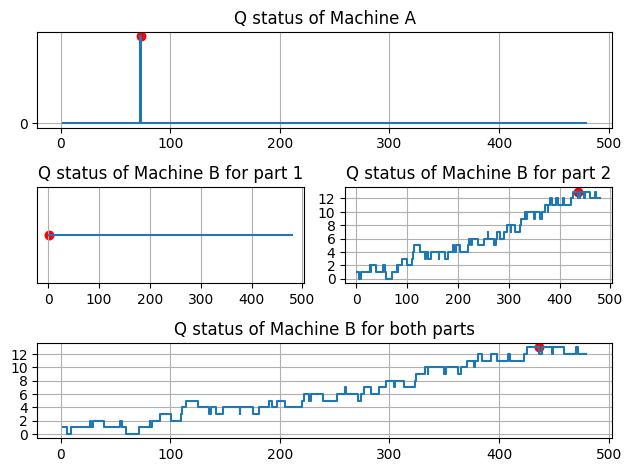

In [98]:
plt.subplot(3,1,1)
plt.step(time_log, queue_status['m1'])
ind = queue_status['m1'].index(max(queue_status['m1']))
plt.scatter(time_log[ind],queue_status['m1'][ind],marker=".",c='r',s=150)
plt.yticks(list(range(max(queue_status['m1']))))
plt.title('Q status of Machine A')
plt.grid(True)

plt.subplot(3,2,3)
plt.step(time_log , queue_status['m2']['p1'])
ind = queue_status['m2']['p1'].index(max(queue_status['m2']['p1']))
plt.scatter(time_log[ind],queue_status['m2']['p1'][ind],marker=".",c='r',s=150)
plt.yticks(list(range(max(queue_status['m2']['p1']))))
plt.title('Q status of Machine B for part 1')
plt.grid(True)

plt.subplot(3,2,4)
plt.step(time_log , queue_status['m2']['p2'])
ind = queue_status['m2']['p2'].index(max(queue_status['m2']['p2']))
plt.scatter(time_log[ind],queue_status['m2']['p2'][ind],marker=".",c='r',s=150)
plt.yticks(list(range(0,max(queue_status['m2']['p2'])+1,2)))
plt.title('Q status of Machine B for part 2')
plt.grid(True)

plt.subplot(3,1,3)
to_be_plotted = [queue_status['m2']['p1'][i]+queue_status['m2']['p2'][i] for i in range(len(queue_status['m2']['p2']))]
plt.step(time_log , to_be_plotted)
ind = to_be_plotted.index(max(to_be_plotted))
plt.scatter(time_log[ind],to_be_plotted[ind],marker=".",c='r',s=150)
plt.yticks(list(range(0,max([queue_status['m2']['p1'][i]+queue_status['m2']['p2'][i] for i in range(len(queue_status['m2']['p2']))])+1,2)))
plt.title('Q status of Machine B for both parts')
plt.grid(True)

plt.tight_layout(pad=1)
plt.show()

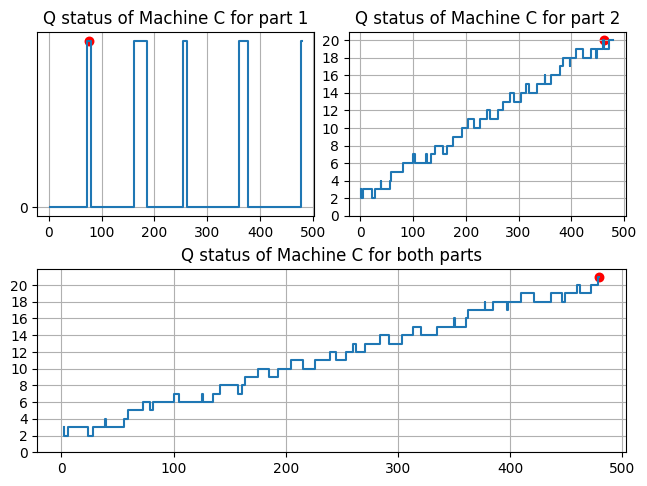

In [99]:

plt.subplot(2,2,1)
plt.step(time_log , queue_status['m3']['p1'])
ind = queue_status['m3']['p1'].index(max(queue_status['m3']['p1']))
plt.scatter(time_log[ind],queue_status['m3']['p1'][ind],marker=".",c='red',s=150)
plt.yticks(list(range(max(queue_status['m3']['p1']))))
plt.title('Q status of Machine C for part 1')
plt.grid(True)

plt.subplot(2,2,2)
plt.step(time_log , queue_status['m3']['p2'])
ind = queue_status['m3']['p2'].index(max(queue_status['m3']['p2']))
plt.scatter(time_log[ind],queue_status['m3']['p2'][ind],marker=".",c='red',s=150)
plt.yticks(list(range(0,max(queue_status['m3']['p2'])+1,2)))
plt.title('Q status of Machine C for part 2')
plt.grid(True)

plt.subplot(2,1,2)
to_be_plotted = [queue_status['m3']['p1'][i]+queue_status['m3']['p2'][i] for i in range(len(queue_status['m3']['p2']))]
ind = to_be_plotted.index(max(to_be_plotted))
plt.scatter(time_log[ind],to_be_plotted[ind],marker=".",c='red',s=150)
plt.step(time_log , to_be_plotted)
plt.yticks(list(range(0,max(to_be_plotted)+1,2)))
plt.title('Q status of Machine C for both parts')
plt.grid(True)

plt.tight_layout(pad=0.5)
plt.show()

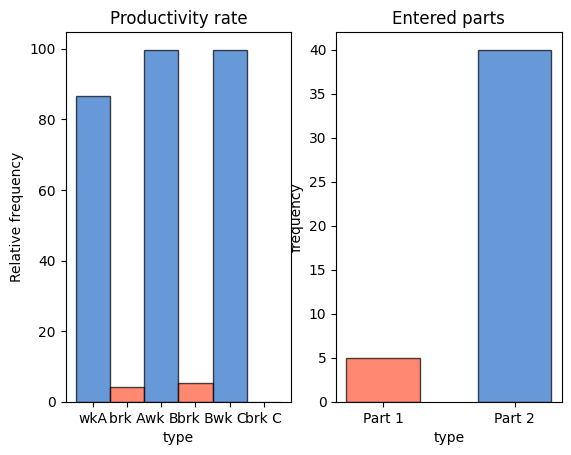

In [100]:
npn1=round(calculate_point_estimation(num_part1_enteries_list))
npn2=round(calculate_point_estimation(num_part2_enteries_list))
wkA=(round(calculate_point_estimation(machine1_worktime),2)/480)*100
wkB=(round(calculate_point_estimation(machine2_worktime),2)/480)*100
wkC=(round(calculate_point_estimation(machine3_worktime),2)/480)*100
brkA=(round(calculate_point_estimation(machine1_downtime),2)/480)*100
brkB=(round(calculate_point_estimation(machine2_downtime),2)/480)*100
brkC=(round(calculate_point_estimation(machine3_downtime),2)/480)*100

plt.subplot(1,2,2)
x = ['Part 1', 'Part 2']
y = [npn1,npn2]
plt.bar(1, y[0], color="#FF5733", edgecolor='black', width = 0.25,  alpha = 0.7)
plt.bar(1.45, y[1], color="#266ECA", edgecolor='black', width = 0.25, alpha = 0.7)
plt.xticks([1,1.45], x)
plt.xlabel('type')
plt.ylabel("frequency")
plt.title("Entered parts")

plt.subplot(1,2,1)
x = ['wkA', 'brk A','wk B','brk B', 'wk C','brk C']
y = [wkA,brkA,wkB,brkB,wkC,brkC]
plt.bar(1, y[0], color="#266ECA", edgecolor='black', width = 0.25, alpha = 0.7)
plt.bar(1.25, y[1], color="#FF5733", edgecolor='black', width = 0.25, alpha = 0.7)
plt.bar(1.5, y[2], color="#266ECA", edgecolor='black', width = 0.25, alpha = 0.7)
plt.bar(1.75, y[3], color="#FF5733", edgecolor='black', width = 0.25, alpha = 0.7)
plt.bar(2, y[4], color="#266ECA", edgecolor='black', width = 0.25, alpha = 0.7)
plt.bar(2.25, y[5], color="#FF5733", edgecolor='#266ECA', width = 0.25, alpha = 0.7)
plt.xticks([1,1.25,1.5,1.75,2,2.25], x)
plt.xlabel('type')
plt.ylabel("Relative frequency")
plt.title("Productivity rate")
plt.show()
